In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1) Resumo geral da base de dados

### Carregamento da base dados pelo Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Inteligência Artificial EC47A/Machine Learning/Projeto_Final'
df=pd.read_csv (path + '/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Análise do DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.shape

(32561, 15)

# Verificação dos valores NaN

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Verificando a distribuição dos possíveis valores das colunas "workclass", "occupation", "native.country"

In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [ ]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

## 2) Pré-processamento

### Verificação e preenchimento de dados NaN

---



In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
import random

### Preenchimentos dos valores faltantes das colunas "workclass" e "occupation" com possíveis valores da coluna de forma aleatória e com chances iguais.

In [ ]:
nans = df['workclass'].isna()
length = sum(nans)
replacement = random.choices(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'], k=length)
df.loc[nans,'workclass'] = replacement

In [ ]:
nans = df['occupation'].isna()
length = sum(nans)
replacement = random.choices(['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical,Sales', 'Other-service','Machine-op-inspct',
'Transport-moving','Handlers-cleaners','Farming-fishing','Tech-support','Protective-serv','Priv-house-serv','Armed-Frces'], k=length)
df.loc[nans,'occupation'] = replacement

In [ ]:
#Retirada da coluna "native.country"
df.drop("native.country",inplace=True,axis=1)

### Encoding Categorical Features


### Utilização do LabelEncoder para categorização das colunas "sex" e "income"

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
#LabelEnconder para "sex","income" {0 e 1}
labelencoder = LabelEncoder()
df[["sex","income"]] = \
df[["sex","income"]].apply(labelencoder.fit_transform)



### Colunas com mais de dois valores


In [ ]:
df["workclass"].value_counts()

Private             22926
Self-emp-not-inc     2774
Local-gov            2340
State-gov            1512
Self-emp-inc         1352
Federal-gov          1161
Never-worked          257
Without-pay           239
Name: workclass, dtype: int64

In [ ]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df["marital.status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [ ]:
df["occupation"].value_counts()

Prof-specialty        4291
Craft-repair          4233
Exec-managerial       4186
Adm-clerical          3770
Sales                 3650
Other-service         3431
Machine-op-inspct     2143
Transport-moving      1768
Handlers-cleaners     1511
Farming-fishing       1137
Tech-support          1073
Protective-serv        787
Priv-house-serv        294
Armed-Frces            142
Adm-clerical,Sales     136
Armed-Forces             9
Name: occupation, dtype: int64

In [ ]:
df["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
#Recebendo dataframe antes de alterar coluna education que será usada no k-means
df_kmeans = df.copy()

In [ ]:
#Binarização dos valores das colunas com mais de um atributo
df = pd.get_dummies(df, columns=["workclass","education","marital.status","occupation","relationship","race"
])

In [ ]:
df

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,90,77053,9,0,0,4356,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,82,132870,9,0,0,4356,18,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,66,186061,10,0,0,4356,40,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32557,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32558,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Normalização dos dados

In [ ]:
std=StandardScaler()
normalizar = ["age","fnlwgt","education.num","capital.gain","capital.loss", "hours.per.week"]
df[normalizar] =\
std.fit_transform(df[normalizar])

In [ ]:
df

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,3.769612,-1.067997,-0.420060,0,-0.14592,10.593507,-0.035429,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,3.183112,-0.539169,-0.420060,0,-0.14592,10.593507,-1.817204,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2.010110,-0.035220,-0.031360,0,-0.14592,10.593507,-0.035429,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1.130359,-0.468215,-2.363558,0,-0.14592,9.461864,-0.035429,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.177296,0.709482,-0.031360,0,-0.14592,9.461864,-0.035429,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,1,-0.14592,-0.216660,-0.035429,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32557,-0.849080,0.639741,0.746039,0,-0.14592,-0.216660,-0.197409,0,0,0,...,0,0,0,0,1,0,0,0,0,1
32558,0.103983,-0.335433,-0.420060,1,-0.14592,-0.216660,-0.035429,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,1.423610,-0.358777,-0.420060,0,-0.14592,-0.216660,-0.035429,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## 3) Algoritmos de Classificação
* Árvore de Decisão
* KNN

### Separação entre treino e teste (70% e 30%)

In [ ]:
X = df.drop(['income'], axis=1).values
y = df['income'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Árvore de Decisão

In [ ]:
DT = DecisionTreeClassifier()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.model_selection import StratifiedKFold

## 5) Balanceamento das classes


In [ ]:
from imblearn.over_sampling import SMOTE

#### Arvore de Decisão - Balanceamento e Validação Cruzada

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    DT.fit(x_train_oversampled, y_train_oversampled)
    lst_accu_stratified.append(DT.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8096407737181456, 0.8172604422604423, 0.8058968058968059, 0.7936117936117936, 0.8031326781326781, 0.8105036855036855, 0.8166461916461917, 0.7991400491400491, 0.8083538083538083, 0.8028255528255528]

Maior ACC: 81.72604422604422 %

Menor ACC: 79.36117936117935 %

Média ACC: 80.67011781089153 %

Desvio Padrão: 0.0074022306030617204


#### KNN - Balanceamento e Validação Cruzada

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    knn.fit(x_train_oversampled, y_train_oversampled)
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.789683758059564, 0.7877764127764127, 0.7862407862407862, 0.7856265356265356, 0.7834766584766585, 0.7764127764127764, 0.7905405405405406, 0.7819410319410319, 0.7822481572481572, 0.7942260442260443]

Maior ACC: 79.42260442260442 %

Menor ACC: 77.64127764127764 %

Média ACC: 78.58172701548507 %

Desvio Padrão: 0.005095828727550546


## 6) Ajuste de hiperparâmetros


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
def train_model(model, param_grid, X_train, y_train, search_method='grid'):
    """
    Treina um modelo utilizando busca de hiperparâmetros.

    Parâmetros:
        - model: Estimador do modelo.
        - param_grid: Dicionário com os hiperparâmetros a serem testados.
        - X_train: Conjunto de treinamento.
        - y_train: Rótulos do conjunto de treinamento.
        - search_method: Método de busca ('grid' ou 'random').

    Retorna:
        O melhor modelo encontrado durante a busca.
    """
    if search_method == 'grid':
        search = GridSearchCV(estimator=model, param_grid=param_grid, refit=True, cv=10)
    elif search_method == 'random':
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=10)
    else:
        raise ValueError("Invalid search_method. Choose 'grid' or 'random'.")

    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    search.fit(X_train_oversampled, y_train_oversampled)

    print("Best Parameters:", search.best_params_)
    print("Best Score:", search.best_score_)

    results = pd.DataFrame(search.cv_results_)
    print("Mean Test Score:", results.loc[search.best_index_,'mean_test_score'])

    return search.best_estimator_

In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Avalia o desempenho de um modelo no conjunto de teste.

    Parâmetros:
        - model: Modelo treinado.
        - X_test: Conjunto de teste.
        - y_test: Rótulos do conjunto de teste.
    """
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

#### Árvore de Decisão

In [ ]:
DT = DecisionTreeClassifier()
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}

#### GridSearchCV


In [ ]:
model = train_model(DT, param_grid_dt, X_train, y_train, search_method='grid')
evaluate_model(model, X_test, y_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8596974878894923
Mean Test Score: 0.8596974878894923
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7479
           1       0.57      0.78      0.66      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.81      0.82      9769



####RandomizedSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = train_model(DT, param_grid_dt, X_train, y_train, search_method='random')
evaluate_model(model, X_test, y_test)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best Score: 0.8556386430311352
Mean Test Score: 0.8556386430311352
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7479
           1       0.58      0.66      0.62      2290

    accuracy                           0.81      9769
   macro avg       0.73      0.76      0.74      9769
weighted avg       0.82      0.81      0.81      9769



#### KNN

In [ ]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3,5,7,9], 'metric':['euclidean', 'manhattan', 'cosine','minkowski']}

#### GridSearchCV


In [ ]:
model = train_model(knn, param_grid_knn, X_train, y_train, search_method='grid')
evaluate_model(model, X_test, y_test)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best Score: 0.883303198613674
Mean Test Score: 0.883303198613674
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7479
           1       0.57      0.71      0.63      2290

    accuracy                           0.80      9769
   macro avg       0.74      0.77      0.75      9769
weighted avg       0.83      0.80      0.81      9769



#### RandomizedSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = train_model(knn, param_grid_knn, X_train, y_train, search_method='random')
evaluate_model(model, X_test, y_test)

Best Parameters: {'n_neighbors': 3, 'metric': 'manhattan'}
Best Score: 0.8849268492363702
Mean Test Score: 0.8849268492363702
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      7479
           1       0.57      0.71      0.63      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.77      0.75      9769
weighted avg       0.83      0.81      0.81      9769



# K-Means

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

### Definindo o dataframe

In [ ]:
#Copiando o dataframe original para utilzar no kmeans
df_padronizado = df_kmeans.copy()

df_padronizado[["education"]] = \
df_padronizado[["education"]].apply(labelencoder.fit_transform)

normalizar = ["age","fnlwgt","education.num","capital.gain","capital.loss", "hours.per.week"]
df_padronizado[normalizar] =\
std.fit_transform(df_padronizado[normalizar])

df_padronizado.drop("income",inplace=True,axis=1)




### Erros mínimos quadrados

In [ ]:
#Variáveis para definir as colunas de observação
colunaX = 'age'
colunaY = 'education'

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df_padronizado[[colunaX, colunaY]])
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

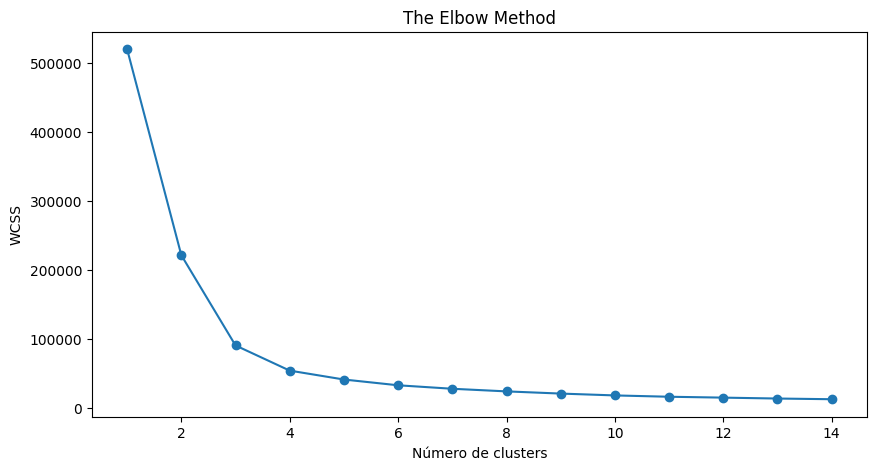

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

### Aplicar o agrupamento K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=300)
kmeans1 = kmeans.fit(df_padronizado[[colunaX, colunaY]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Adicionar rótulos de cluster ao dataframe original

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_

In [ ]:
#SepalLengthCm x PetalLengthCm
graf1 = px.scatter(x = df_padronizado[colunaX], y = df_padronizado[colunaY], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [10, 10, 10, 10])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'SepalLengthCm')
graf3.update_yaxes(title = 'PetalLengthCm')
graf3.show()

In [ ]:
#Adicionando o resultado do cluster no dataframe original (sem padronização)
df_padronizado = pd.read_csv (path + '/adult_2.csv')

df_padronizado[["education"]] = \
df_padronizado[["education"]].apply(labelencoder.fit_transform)

df_padronizado['cluster'] = kmeans1.labels_

df_padronizado


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,90,NaN,77053,11,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,3
1,82,Private,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,3
2,66,NaN,186061,15,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,1
3,54,Private,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,15,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,15,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
32557,27,Private,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32558,40,Private,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,3
32559,58,Private,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,3


# Plotar os clusters

In [ ]:
cores = ['r', 'g', 'b', 'c']


### Gráfico de dispersão com cores diferentes para cada cluster

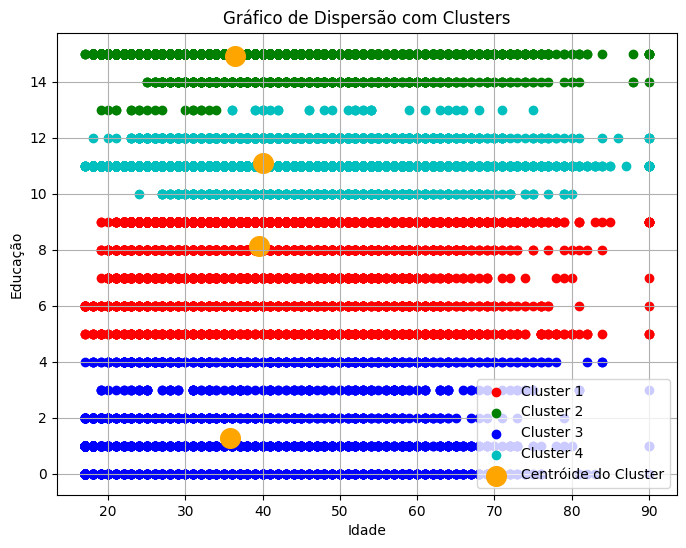

In [ ]:
plt.figure(figsize=(8, 6))
for i in range(4):
    dados_cluster = df_padronizado[df_padronizado['cluster'] == i]
    plt.scatter(dados_cluster[colunaX], dados_cluster[colunaY], c=cores[i], label=f'Cluster {i + 1}')
    if i == 3:  # Adicionar a entrada de legenda do centróide apenas para o primeiro cluster
        plt.scatter(dados_cluster[colunaX].mean(), dados_cluster[colunaY].mean(), s=200, c='orange', marker='o',
                    label='Centróide do Cluster')
    else:
        plt.scatter(dados_cluster[colunaX].mean(), dados_cluster[colunaY].mean(), s=200, c='orange', marker='o')

plt.xlabel('Idade')
plt.ylabel('Educação')
plt.title('Gráfico de Dispersão com Clusters')
plt.legend()
plt.grid(True)
plt.show()